In [3]:
import pandas as pd
import numpy as np
df = pd.read_csv("C:\\Users\\Omar\\Desktop\\Optimization Project\\Data & Notebook\\new data\\time_series_19-covid-Confirmed.csv")
df_arr = np.array(df)

In [4]:
row = df_arr[0,4:]

In [5]:
countries = []
for index,row in df.iterrows():
    countries.append(row['Country/Region'])

In [6]:
# import the necessary module
from sklearn import preprocessing
# create the LabelEncoder Object
le = preprocessing.LabelEncoder()
# convert the categorical columns into numeric
df['Country/Region'] = le.fit_transform(df['Country/Region'])

In [7]:
country_newCases = []

for i in range(0, len(countries)):
    country_row = list(df.loc[i].values)
    country_cases = country_row[4:]
    newCases = [0]
    for i in range(len(country_cases) - 1):
        if country_cases[i + 1] > country_cases[i]:
            newCases.append(country_cases[i + 1] - country_cases[i])
        else:
            newCases.append(0)
    country_newCases.append(newCases)
    
number_of_days = range(0,len(df_arr[0,4:]))
temp = []
for i in range(len(number_of_days)):
    temp.append(float(number_of_days[i]))
temp = np.array(temp)

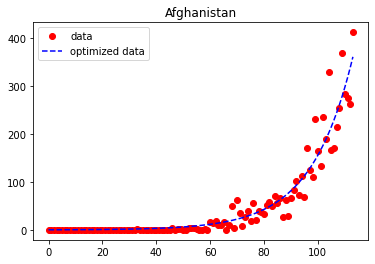

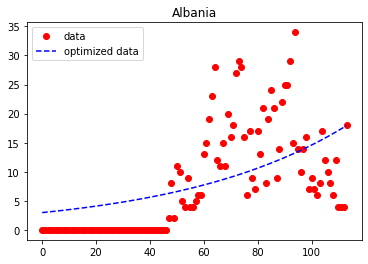

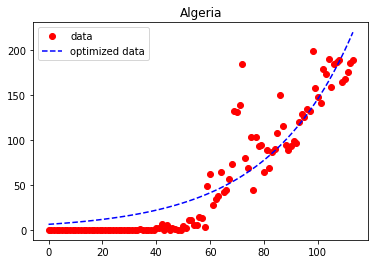

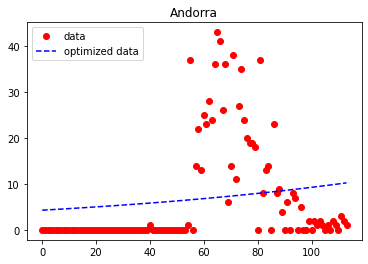

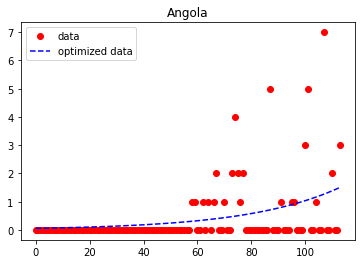

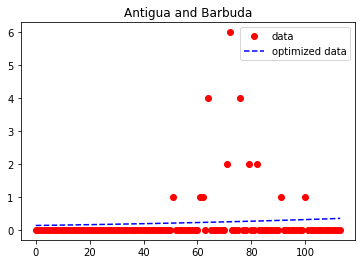

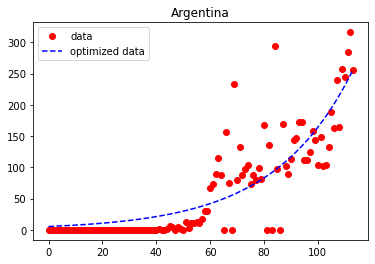

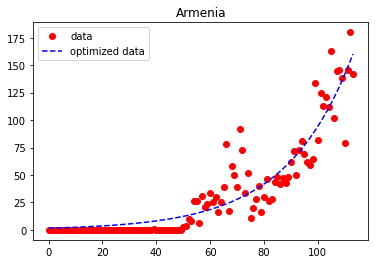

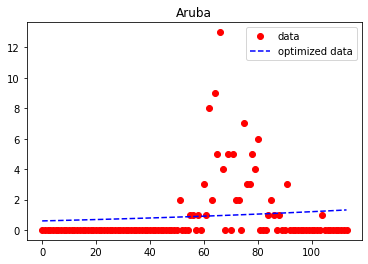

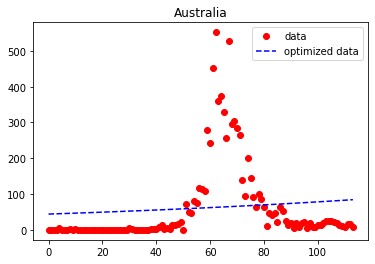

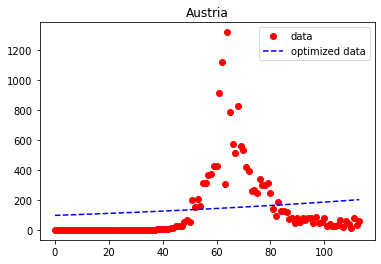

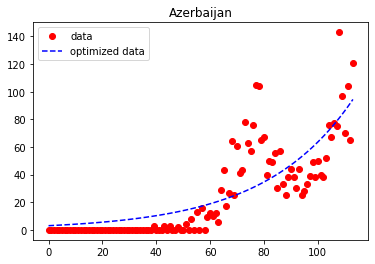

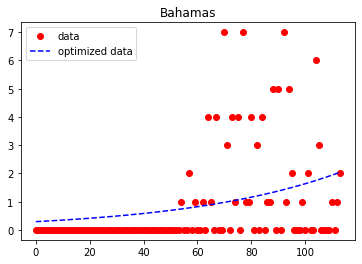

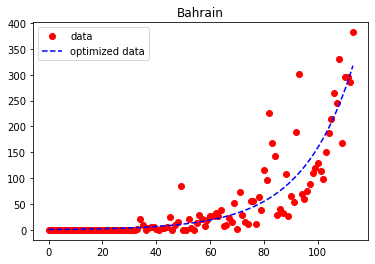

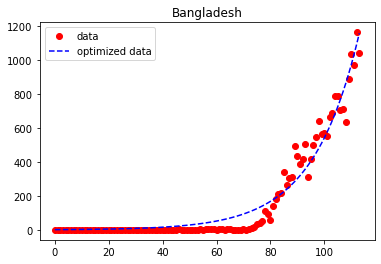

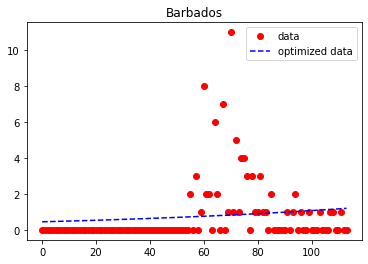

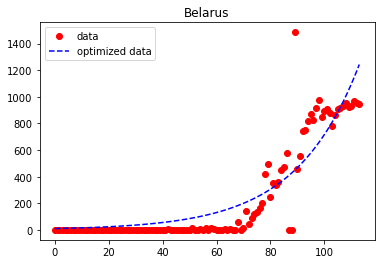

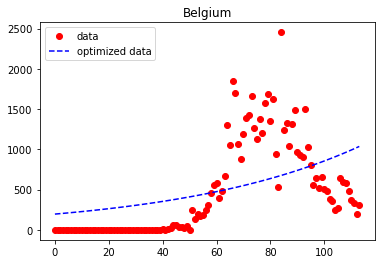

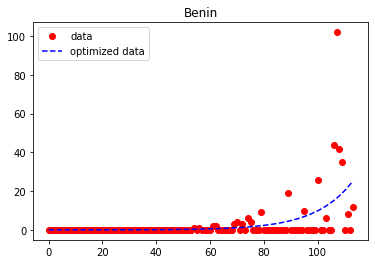

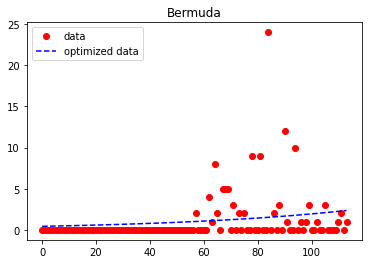

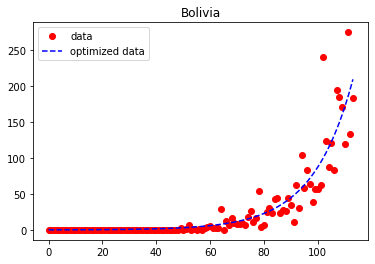

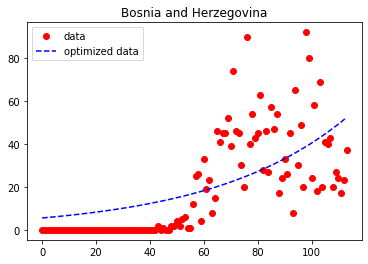

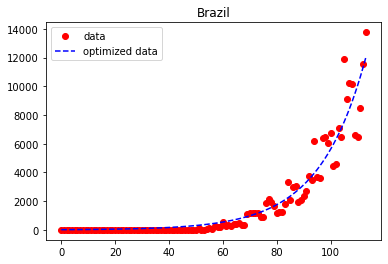

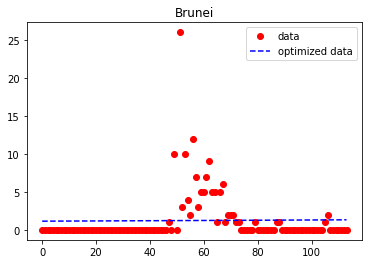

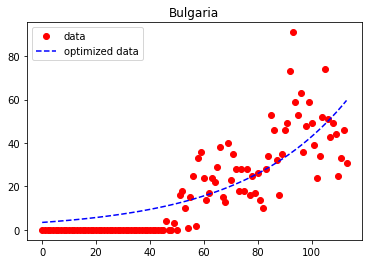

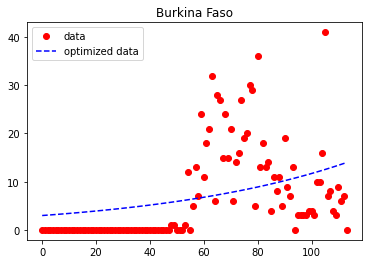

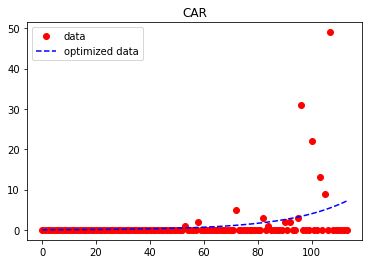

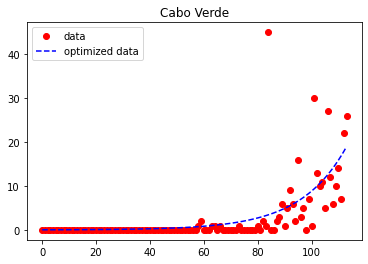

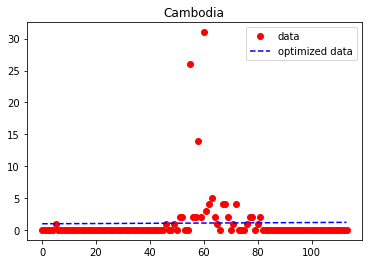

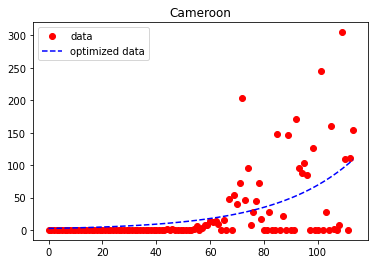

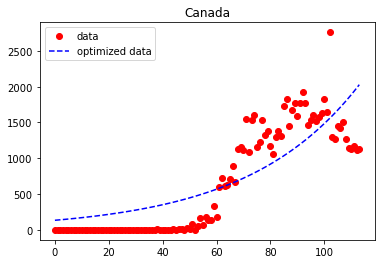

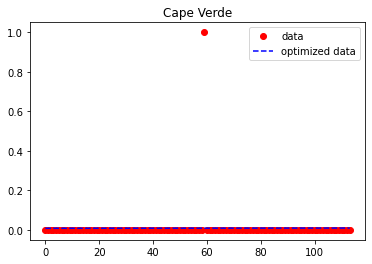

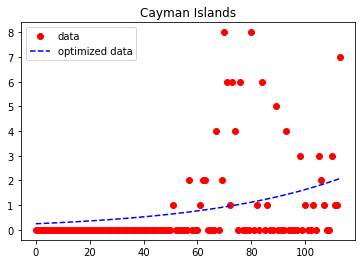

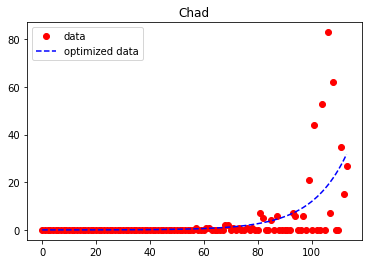

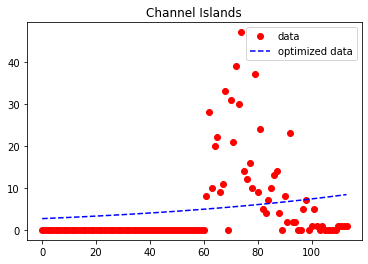

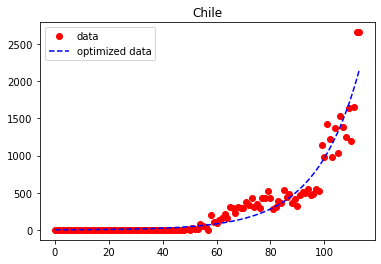

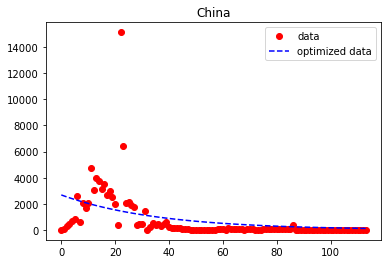

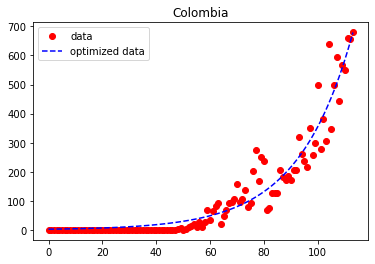

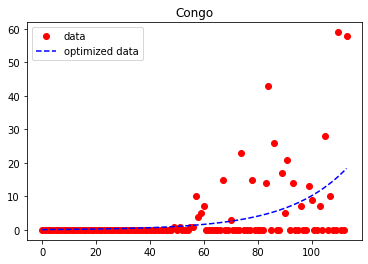

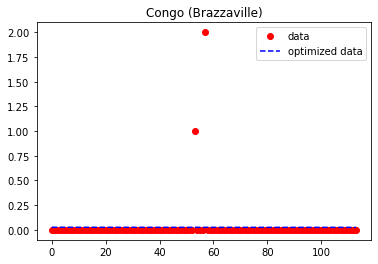

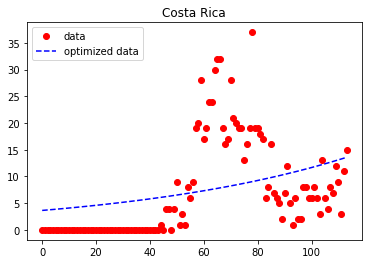

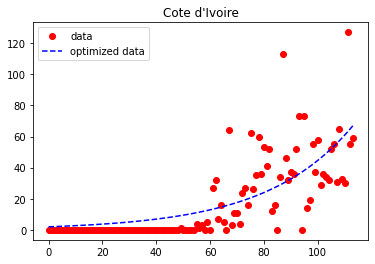

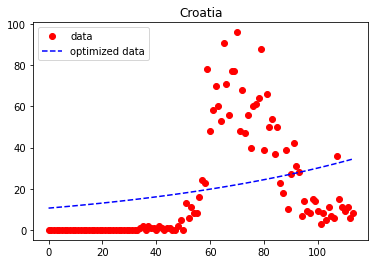

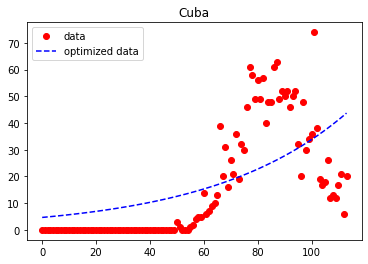

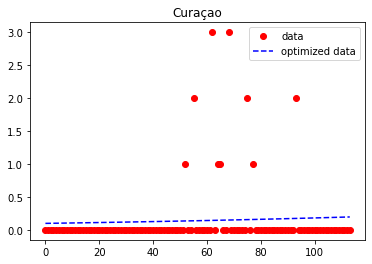

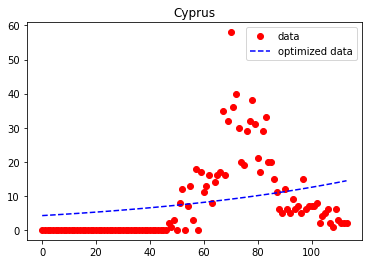

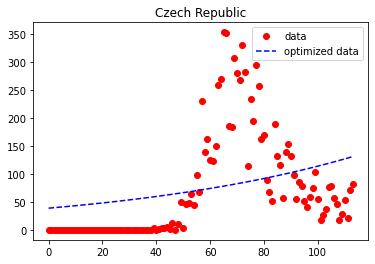

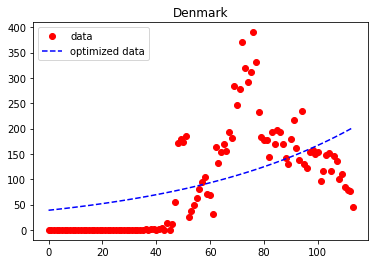

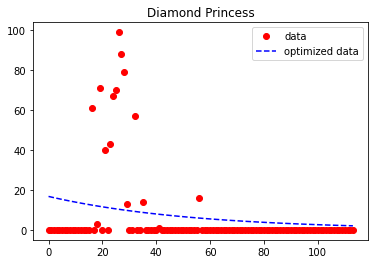

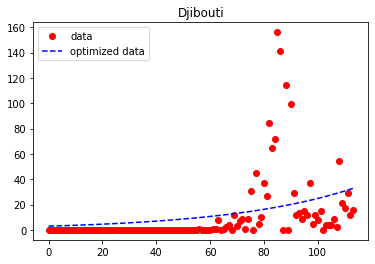

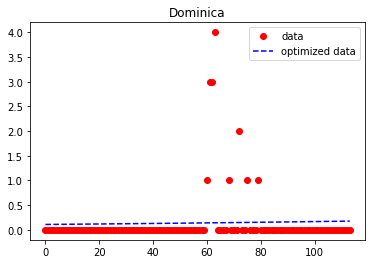

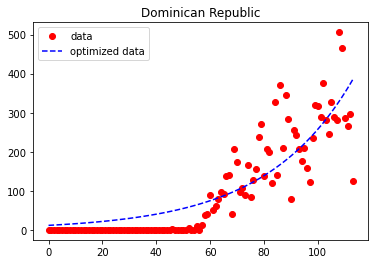

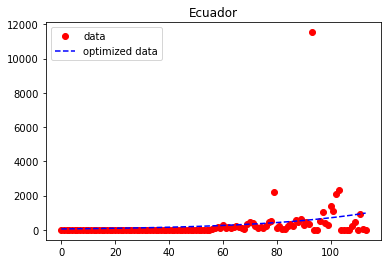

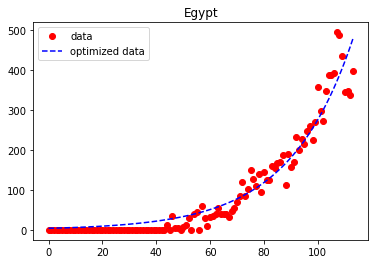

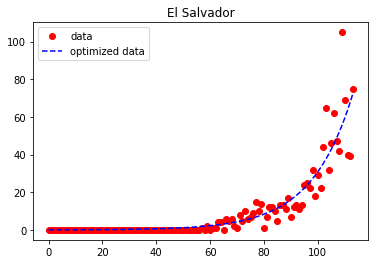

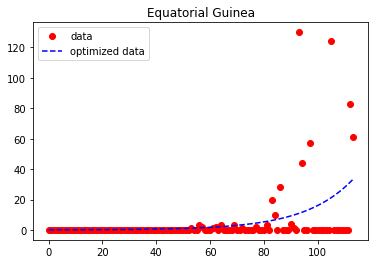

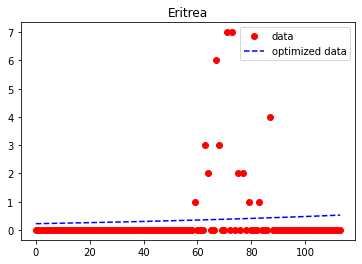

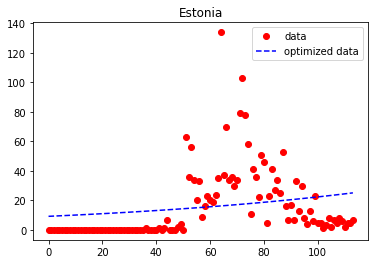

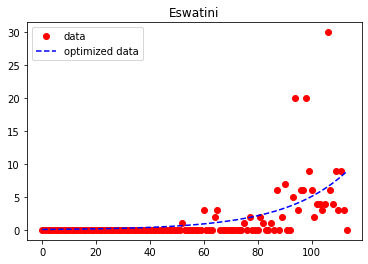

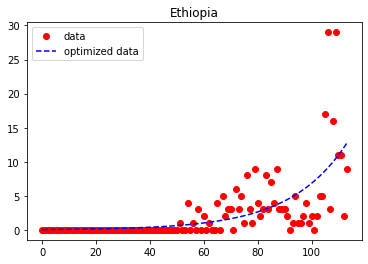

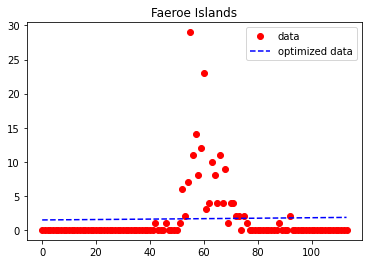

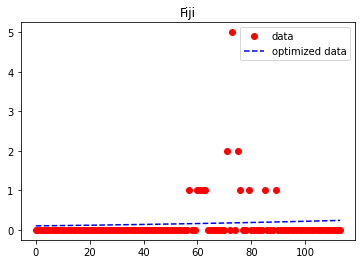

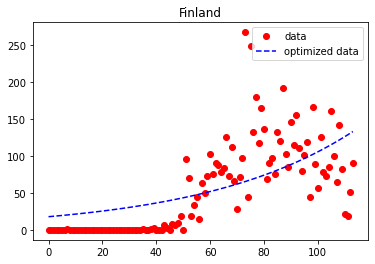

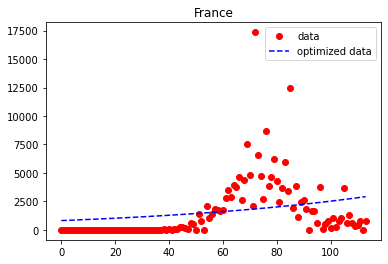

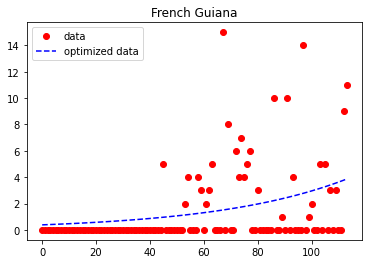

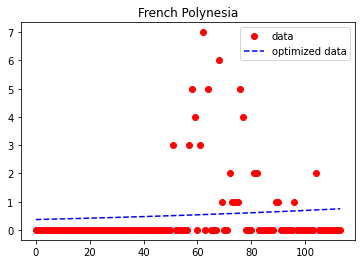

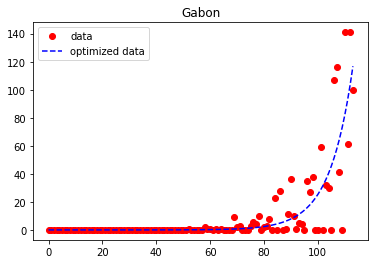

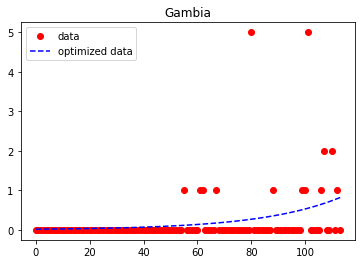

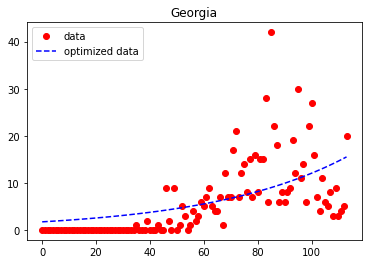

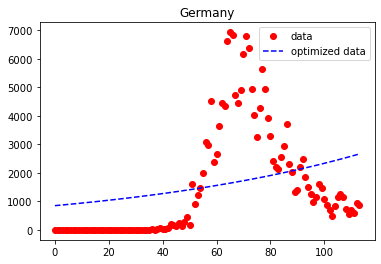

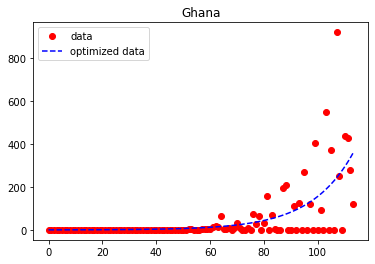

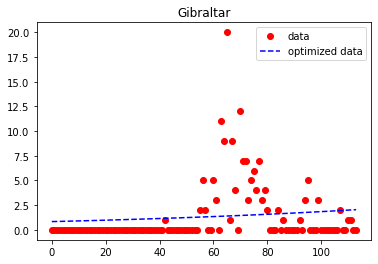

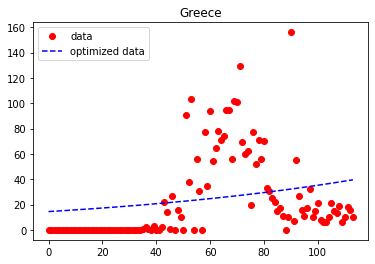

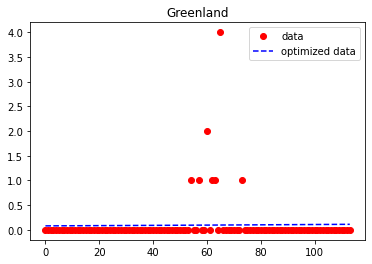

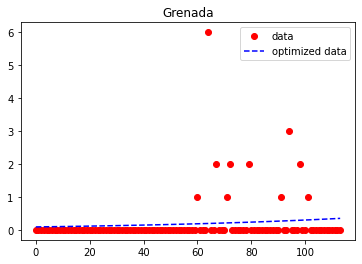

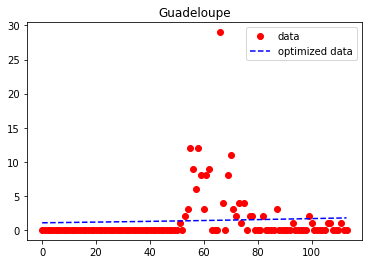

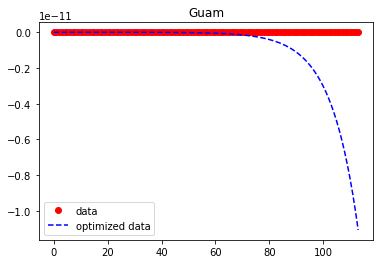

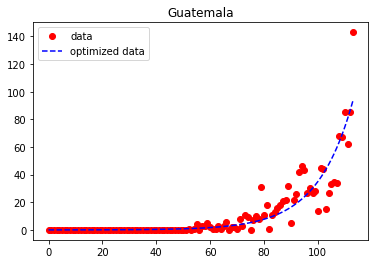

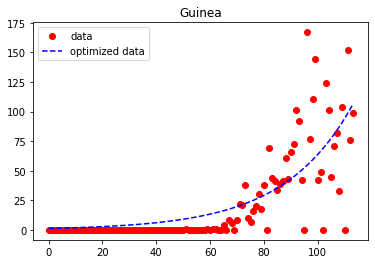

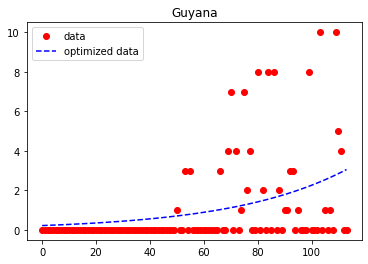

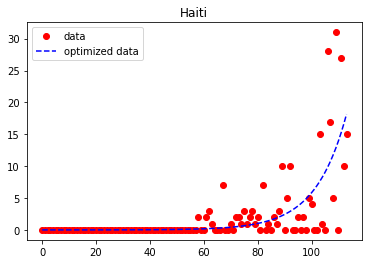

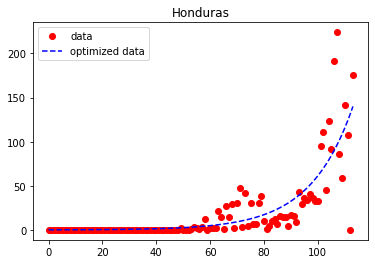

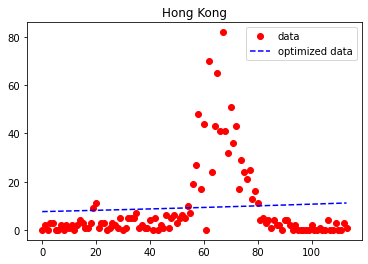

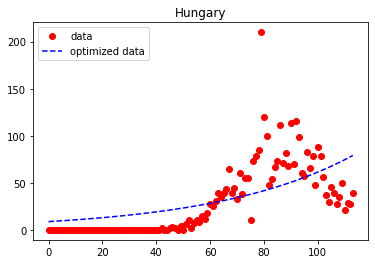

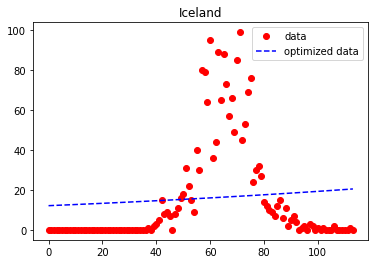

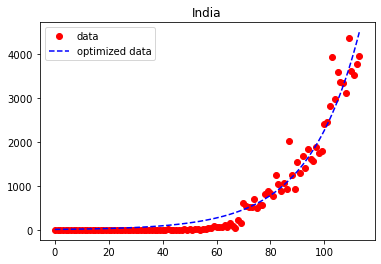

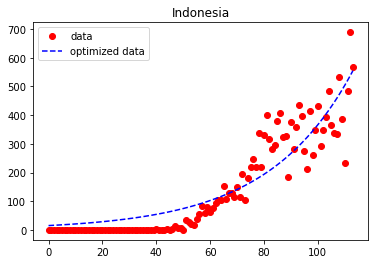

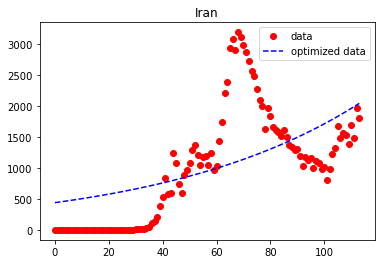

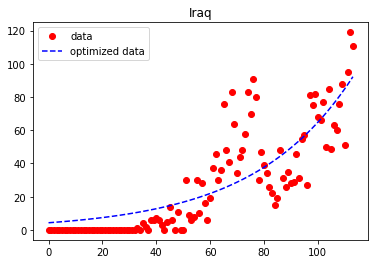

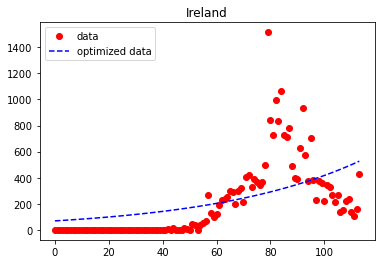

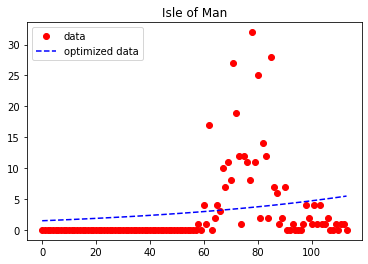

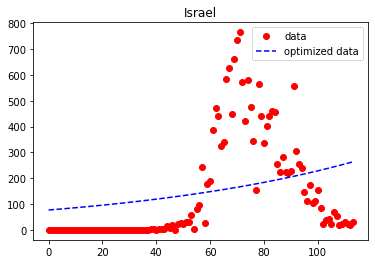

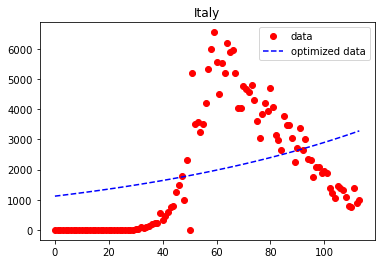

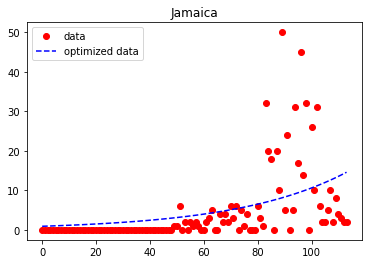

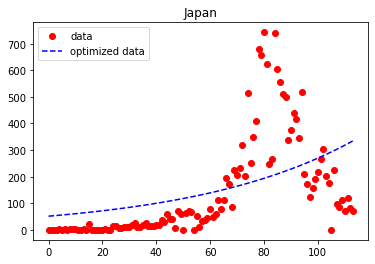

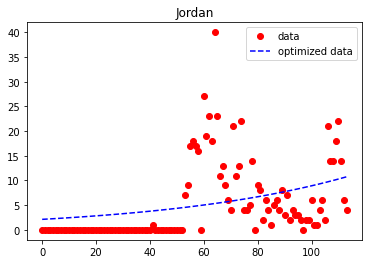

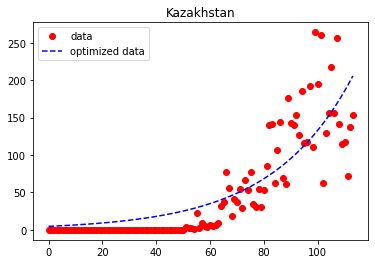

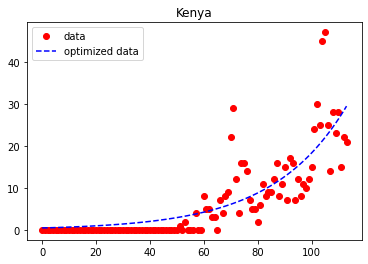

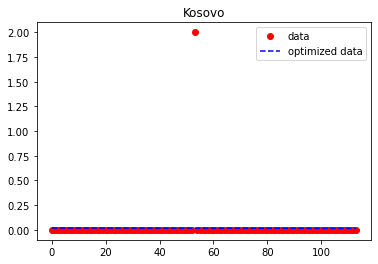

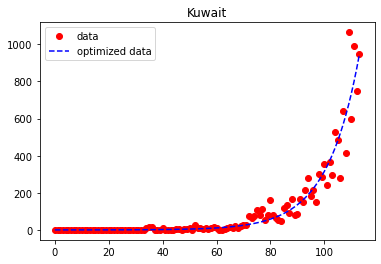

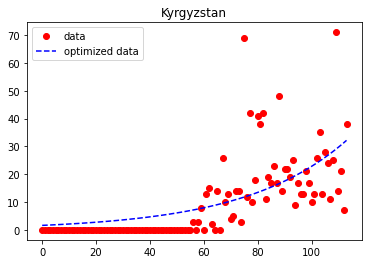

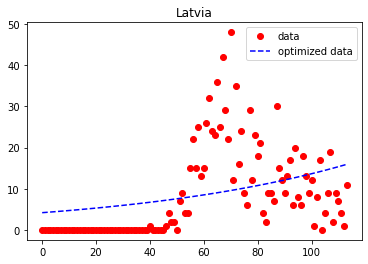

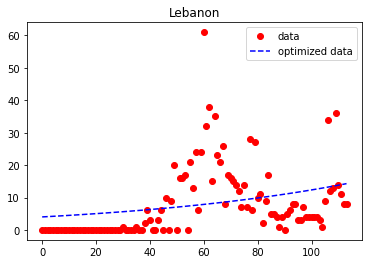

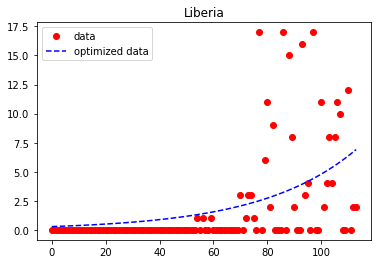

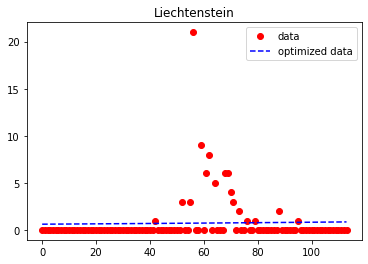

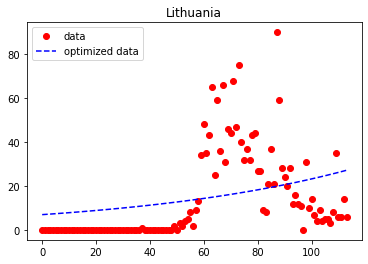

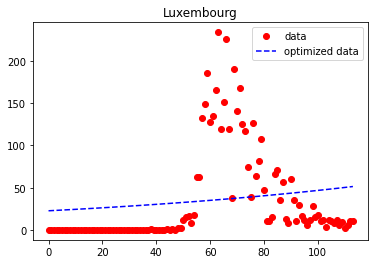

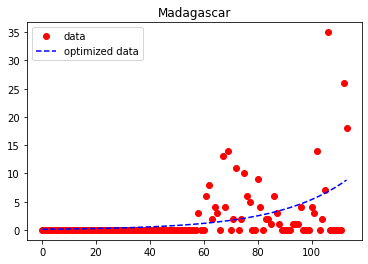

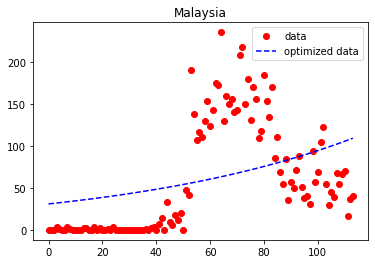

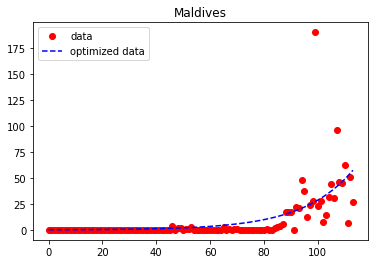

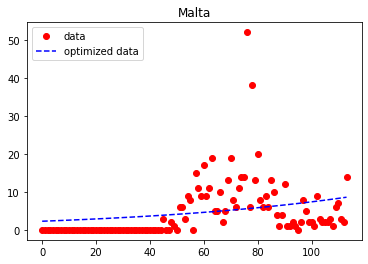

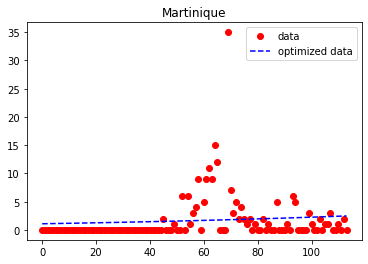

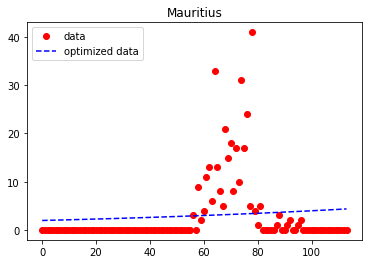

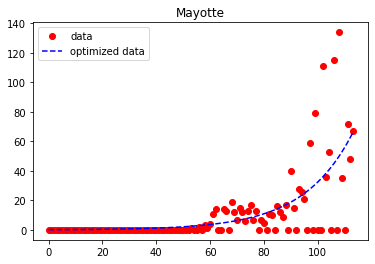

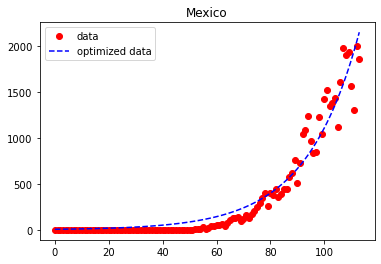

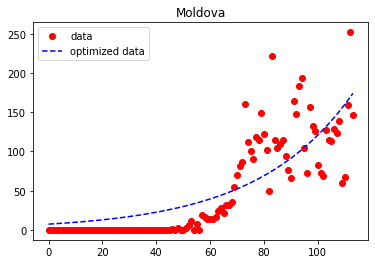

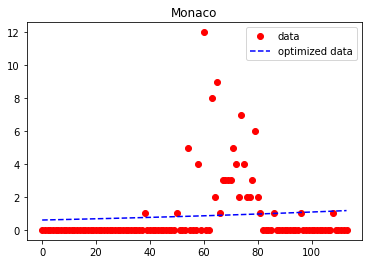

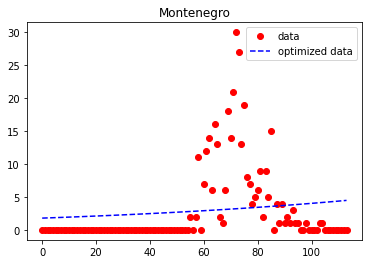

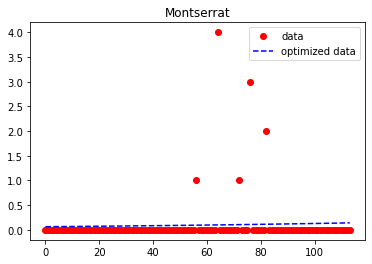

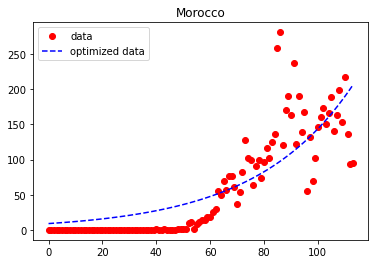

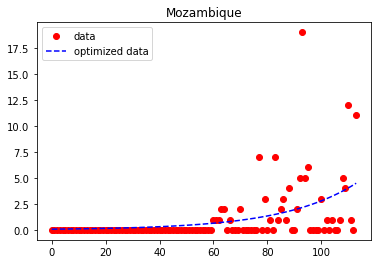

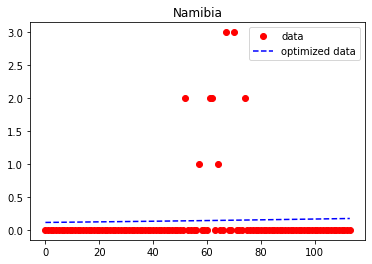

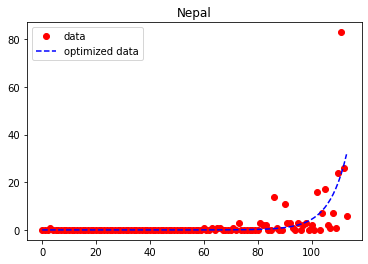

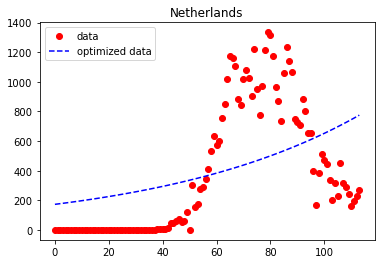

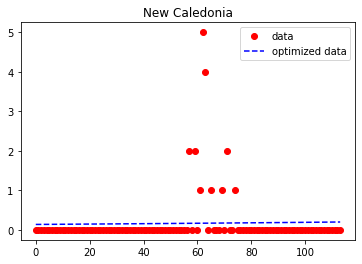

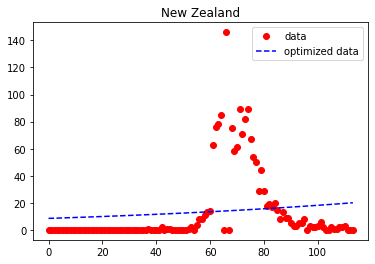

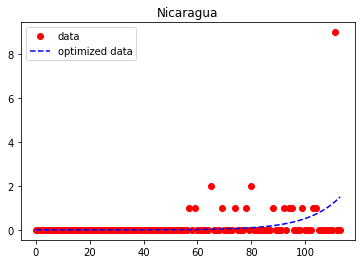

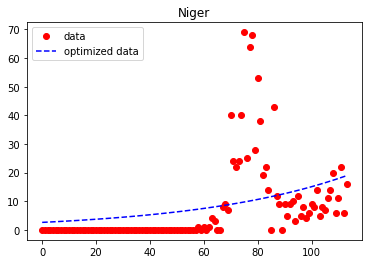

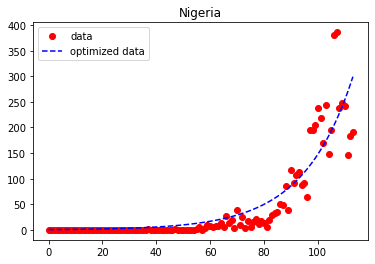

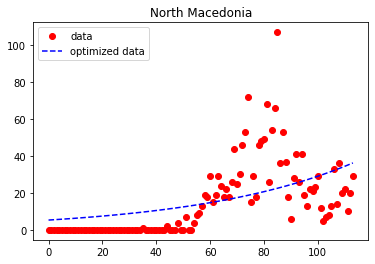

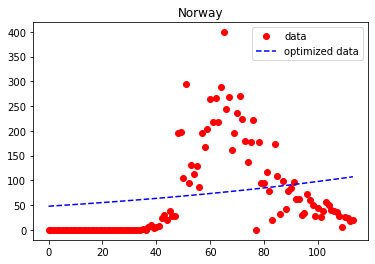

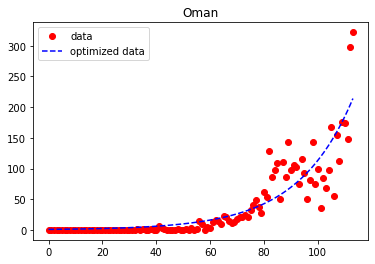

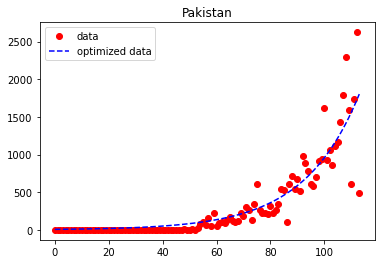

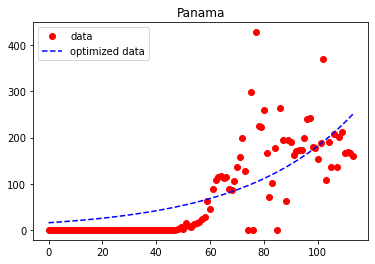

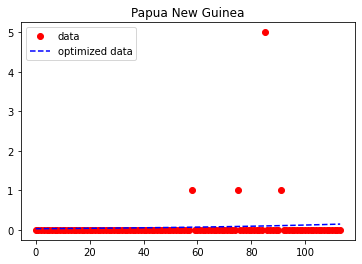

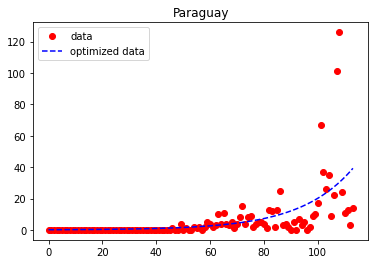

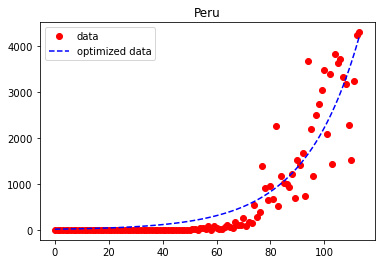

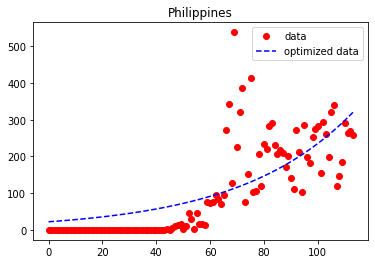

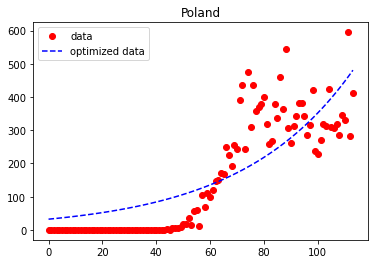

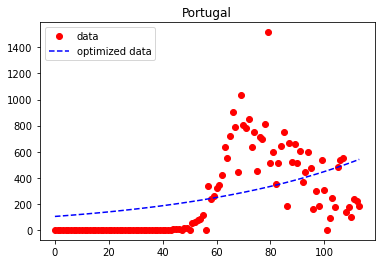

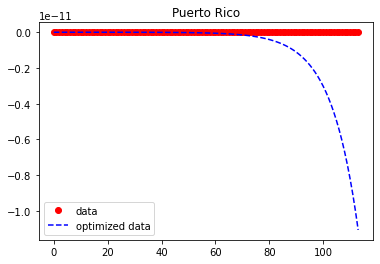

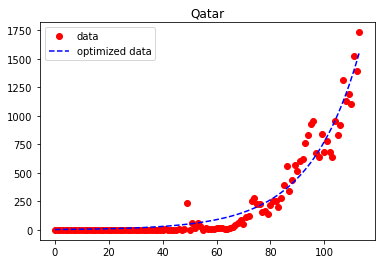

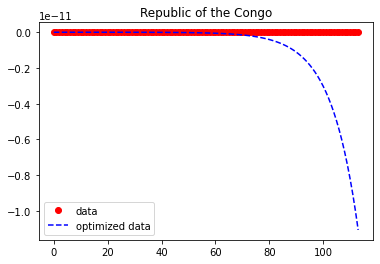

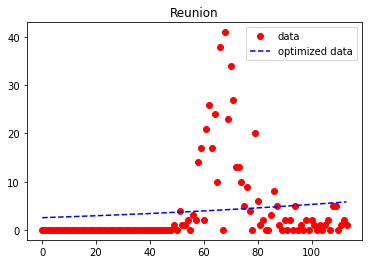

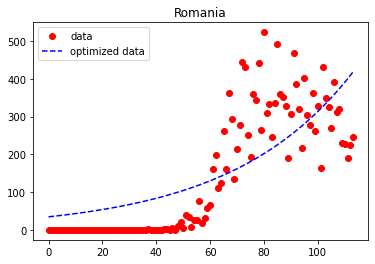

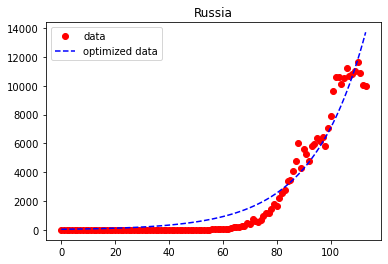

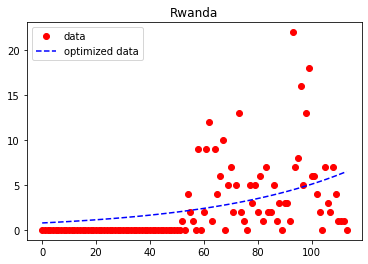

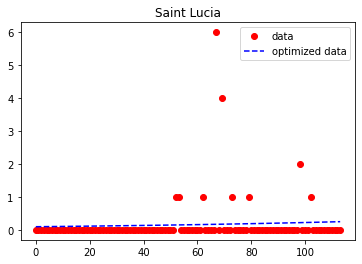

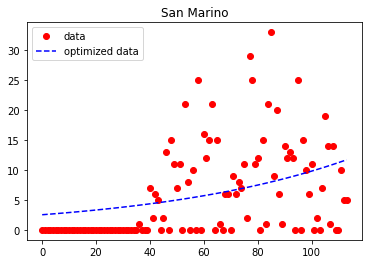

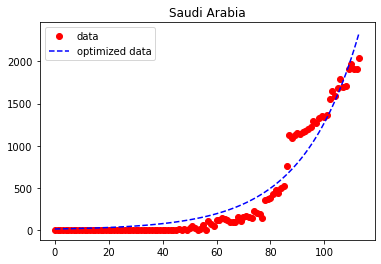

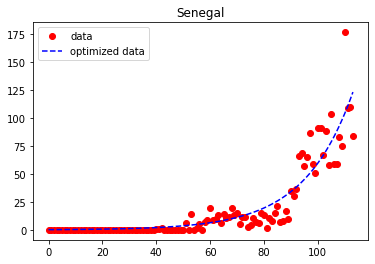

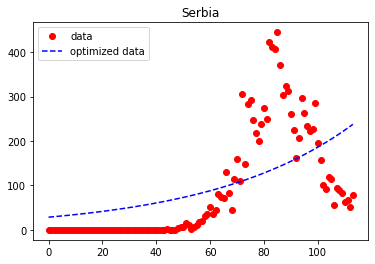

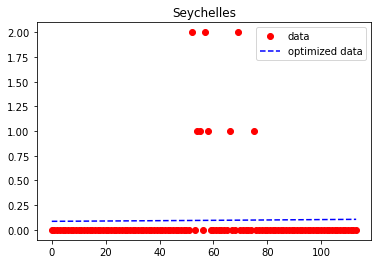

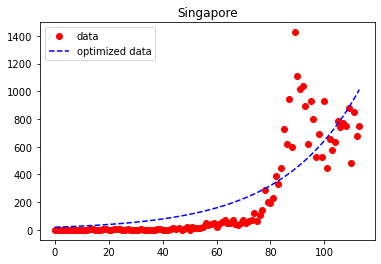

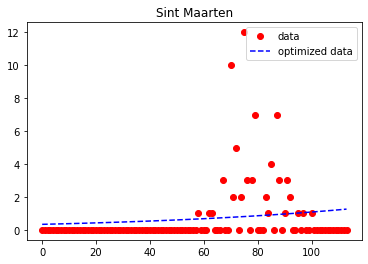

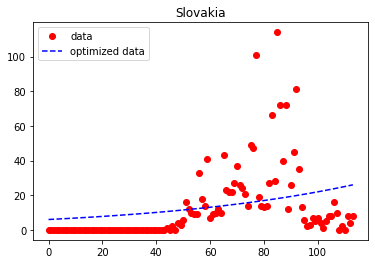

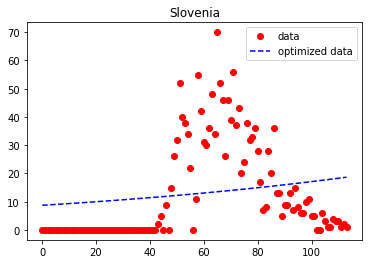

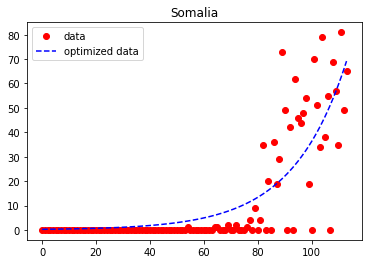

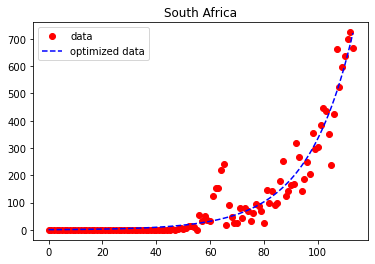

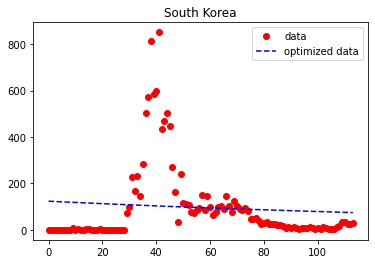

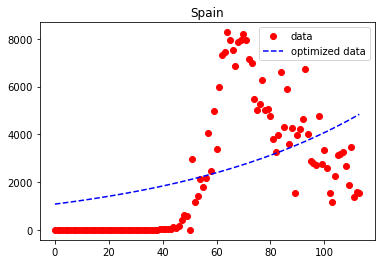

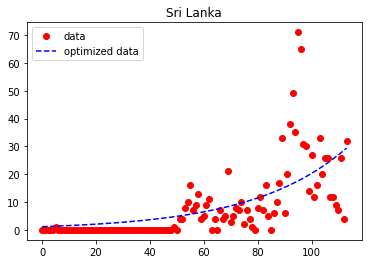

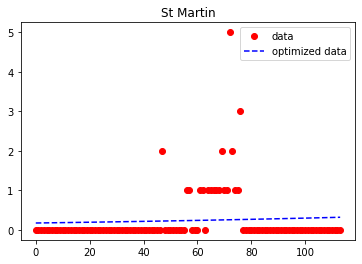

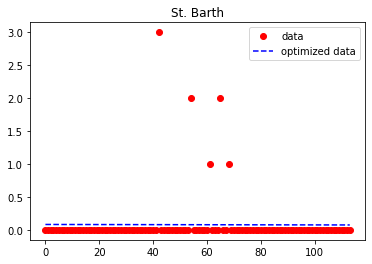

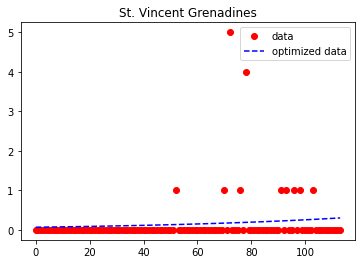

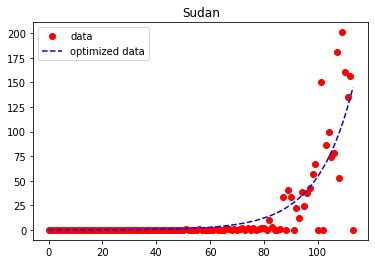

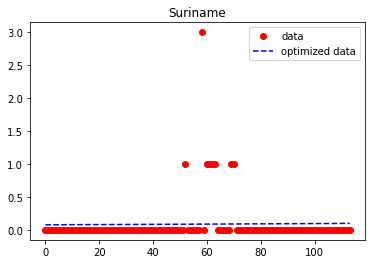

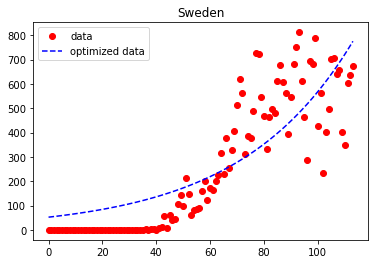

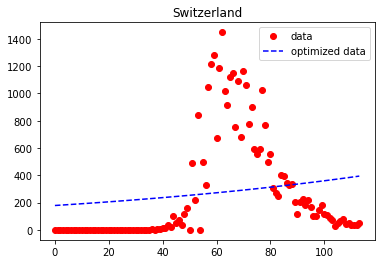

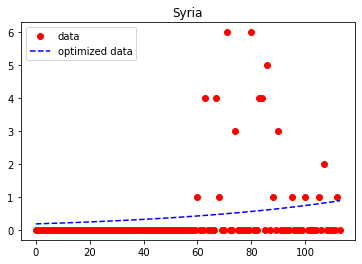

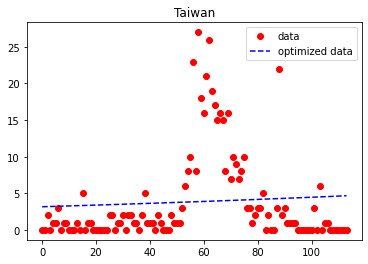

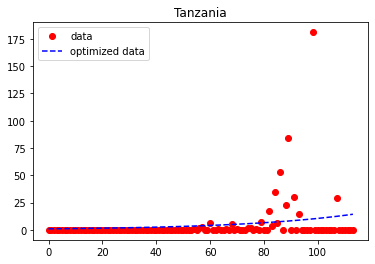

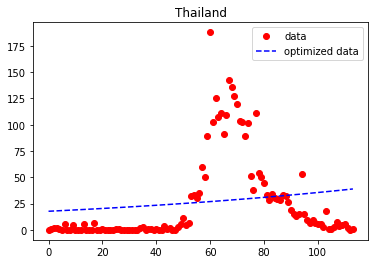

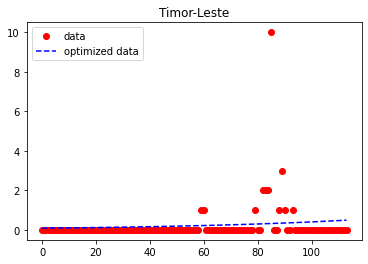

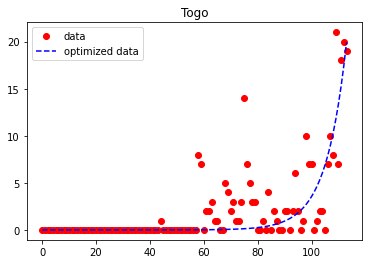

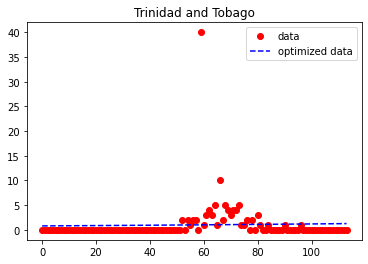

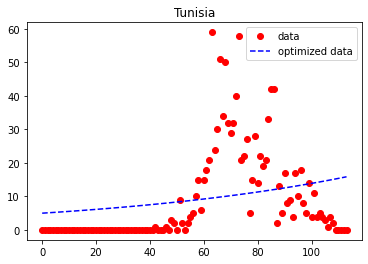

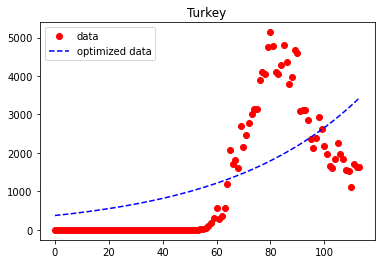

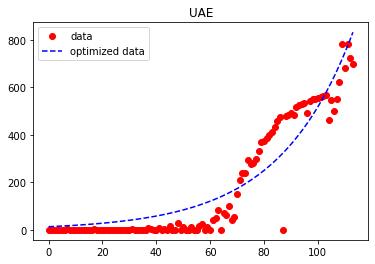

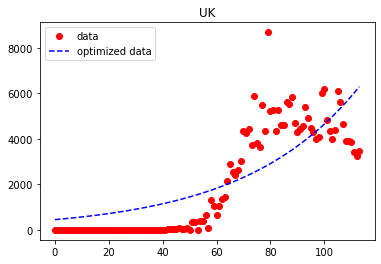

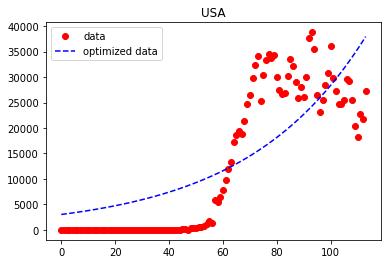

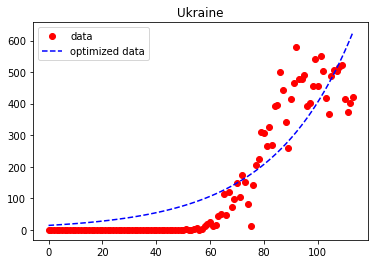

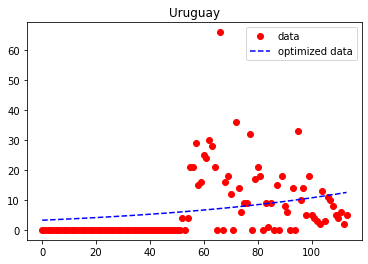

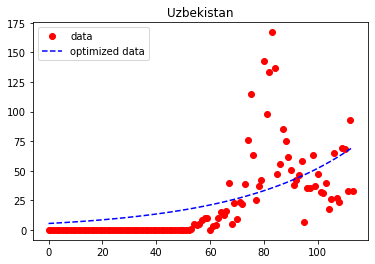

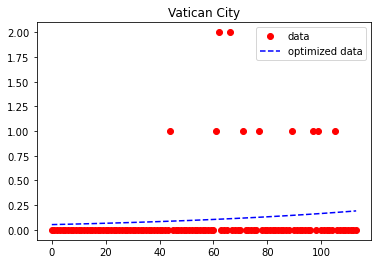

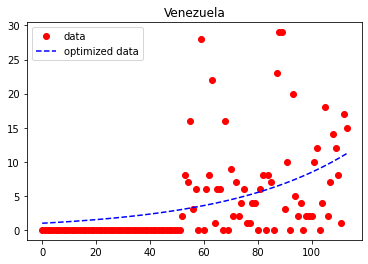

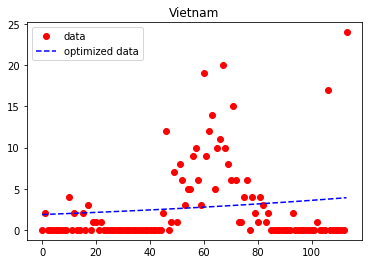

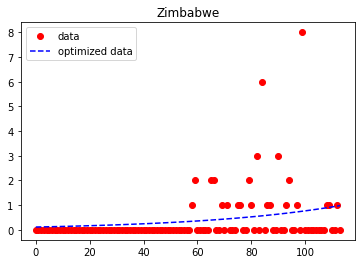

In [8]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

no_optimal = []
number_of_days = range(0,len(df_arr[0,4:]))

for i in range(0, len(countries)):
    try:
        param, param_cov = curve_fit(lambda t,a,b: a*np.exp(b*t),  number_of_days,  country_newCases[i],  p0=(4, 0.1))        
        ans = (param[0]*(np.exp(param[1] * temp)))
        
        plt.figure()
        plt.plot(number_of_days, country_newCases[i], 'o', color = 'red', label = "data")
        plt.plot(number_of_days, ans, '--', color = 'blue', label = 'optimized data')
        plt.legend()
        plt.title(countries[i])
        plt.show()
    except:
        no_optimal.append(i)

We cannot find Optimal Solutions for these Countries!


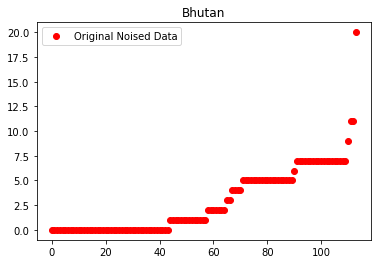

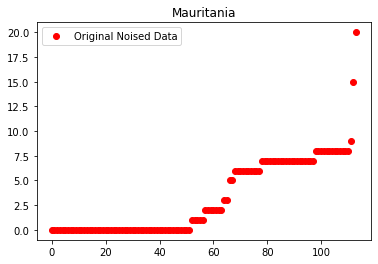

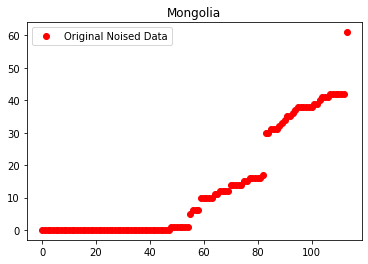

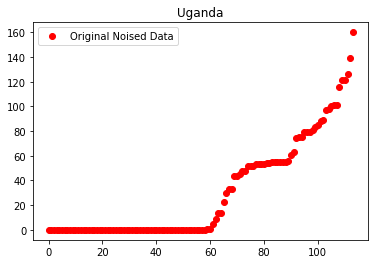

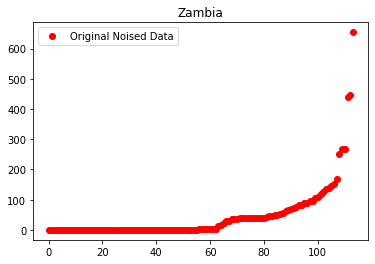

In [18]:
import matplotlib.pyplot as plt

print("We cannot find Optimal Solutions for these Countries!")

for i in range(len(no_optimal)):
    y = df_arr[no_optimal[i], 4:]
    plt.figure()
    plt.plot(range(0, len(y)), y, 'o', color ='red', label ="Original Noised Data")
    plt.legend()
    plt.title(df_arr[no_optimal[i],0])
    plt.show()

In [100]:
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

error = []
for i in range(0, df_arr.shape[0]):
    x = np.linspace(0, 1, len(df_arr[i, 4:]))
    y = df_arr[i, 4:]
    try:
        popt, pcov = curve_fit(func, x, y)
        yn = np.array(func(x, *popt))
        error.append(abs(yn - y))
    except:
        continue

188


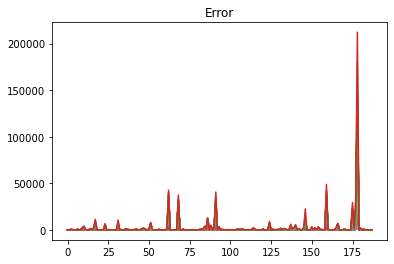

In [101]:
print(len(error))
plt.figure()
plt.title('Error')
plt.plot(error)
plt.show()

In [83]:
path ="C:\\Users\\Omar\\Desktop\\Optimization Project\\Data & Notebook\\new data\\Temperature _ Humidity Data\\Egypt.csv"
path1 ="C:\\Users\\Omar\\Desktop\\Optimization Project\\Data & Notebook\\new data\\Temperature _ Humidity Data\\Italy.csv"
path2 ="C:\\Users\\Omar\\Desktop\\Optimization Project\\Data & Notebook\\new data\\Temperature _ Humidity Data\\Spain.csv"

factors = pd.read_csv(path)
factors1 = pd.read_csv(path1)
factors2 = pd.read_csv(path2)

In [22]:
import datetime as DT
def numOfDays(date2, date1):
    d = (date1 - date2).days
    if d > 0:
        return d
    else:
        return 0

In [107]:
# curfew start dates of --> Egypt, Spain, Italy
curfew_start_date = [DT.date(2020, 3, 23),DT.date(2020, 3, 14),DT.date(2020, 3, 9)]
first_day = DT.date(2020, 1, 22)
today = DT.date(2020,5,14)
difference = numOfDays(first_day, today)

In [109]:
curfew_diff = []
number_of_days_since_curfew = []
for j in range(len(curfew_start_date)):
    curfew_diff = numOfDays(curfew_start_date[j], today)
    before_curfew = difference - curfew_diff
    number_of_days_since_curfew.append([0] * before_curfew)
    i = curfew_diff
    for i in range(curfew_diff+1):
        day_i = today - DT.timedelta(days=i)
        number_of_days_since_curfew[j].append(numOfDays(day_i, today))

In [111]:
factors['Number of days since the start of curfew'] = number_of_days_since_curfew[0]
factors1['Number of days since the start of curfew'] = number_of_days_since_curfew[1]
factors2['Number of days since the start of curfew'] = number_of_days_since_curfew[2]

In [120]:
# Considering Egypt, Italy, Spain
factors['New Cases'] = country_newCases[54]
factors1['New Cases'] = country_newCases[93]
factors2['New Cases'] = country_newCases[163]

In [113]:
cols = [col for col in factors.columns if col in ['maxtempC','mintempC','humidity','Number of days since the start of curfew']]
cols1 = [col for col in factors1.columns if col in ['maxtempC','mintempC','humidity','Number of days since the start of curfew']]
cols2 = [col for col in factors2.columns if col in ['maxtempC','mintempC','humidity','Number of days since the start of curfew']]

# feature
data = factors[cols]
data1 = factors1[cols1]
data2 = factors2[cols2]

In [119]:
target = factors['New Cases']
target1 = factors1['New Cases']
target2 = factors2['New Cases']

In [121]:
from sklearn import linear_model

reg = linear_model.LinearRegression()

# import the necessary module
from sklearn.model_selection import train_test_split
#split data set into "train" and "test" sets
data_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.15, random_state = 10)

In [122]:
pred = reg.fit(data, target).predict(data_test)

In [123]:
from sklearn.metrics import r2_score
acc = r2_score(target_test, pred)*100
print(str(acc) + " %")

93.01413998176089 %


In [124]:
countries_list = [54, 70, 93, 182, 163, 180, 183]
countries_list.sort()
df_2 = df.copy()
df_2 = df.loc[countries_list]

In [125]:
countries_list_names = ['Egypt','Germany','Italy','UK','Spain','Turkey','USA']
maxtempC_list = []
mintempC_list = []

for i in range(len(countries_list)):
    path ="C:\\Users\\Omar\\Desktop\\Optimization Project\\Data & Notebook\\new data\\Temperature _ Humidity Data\\" + countries_list_names[i] + '.csv'
    new_factors = pd.read_csv(path)

    # country_row = list(new_factors.loc[i].values)
    maxtempC = list(new_factors['maxtempC'])
    mintempC = list(new_factors['mintempC'])
    
    avgmaxtempC = sum(maxtempC)/len(maxtempC)
    avgmintempC = sum(mintempC)/len(mintempC)
    
    maxtempC_list.append(avgmaxtempC)
    mintempC_list.append(avgmintempC)

df_2.loc[:,'avgmaxtempC'] = maxtempC_list
df_2.loc[:,'avgmintempC'] = mintempC_list

In [126]:
countries_population = [102103353, 83752482, 60472207, 46752659, 84231508, 67844072, 330773982]
df_2.loc[:,'Population'] = countries_population

In [127]:
cols11 = [col for col in df_2.columns if col in ['Province/State','Country/Region','Long','Lat','avgmaxtempC','avgmintempC','Population','5/14/20']]
df_2 = df_2[cols11]

In [128]:
df_2 = df_2[['Province/State', 'Country/Region','Long','Lat', 'avgmaxtempC', 'avgmintempC', 'Population','5/14/20']]
df_2

,Province/State,Country/Region,Long,Lat,avgmaxtempC,avgmintempC,Population,5/14/20
54,Egypt,54,30.0000,26.0000,25.263158,15.324561,102103353,10829
70,Germany,70,9.0000,51.0000,11.473684,4.921053,83752482,174975
93,Italy,93,12.0000,43.0000,17.745614,10.710526,60472207,223096
163,Spain,163,-4.0000,40.0000,12.885965,7.000000,46752659,272646
180,Turkey,180,35.2433,38.9637,17.421053,9.342105,84231508,144749
182,UK,182,-3.4360,55.3781,12.570175,2.684211,67844072,233151
183,USA,183,-101.2500,39.9090,16.728070,7.903509,330773982,1457593


In [129]:
# Economy Factors
countries_GDP = [315.00,4110.00,2014.00,1500.00,813.81,2744,20140.00]
countries_inflation_rate = [5.9,0.32,0.24,1.05,0.85,1.5,0.3]

In [130]:
df_2.loc[:,'GDP(Billion)'] = countries_GDP
df_2.loc[:,'Inflation Rate (%)'] = countries_inflation_rate

In [131]:
# Educational factors
countries_tertiary = [11.6,28.58,18.67,36.35,20.01,45.74,46.36]
countries_before_tertirary = [88.36,71.42,81.33,63.65,79.99,54.25,53.64]
number_of_universities = [20,380,90,76,180,106,1626]
df_2.loc[:,'Tertiary (%)'] = countries_tertiary
df_2.loc[:,'Before Tertiary (%)'] = countries_before_tertirary
df_2.loc[:,'# of universities'] = number_of_universities
#countries_Upper_Secondary = [,57.94,42.25,22.72,19.28,35.42,44.29]
#countries_Below_Upper_Secondary = [,13.48,39.08,40.93,60.71,18.83,9.35]

In [132]:
df_2

,Province/State,Country/Region,Long,Lat,avgmaxtempC,avgmintempC,Population,5/14/20,GDP(Billion),Inflation Rate (%),Tertiary (%),Before Tertiary (%),# of universities
54,Egypt,54,30.0000,26.0000,25.263158,15.324561,102103353,10829,315.00,5.90,11.60,88.36,20
70,Germany,70,9.0000,51.0000,11.473684,4.921053,83752482,174975,4110.00,0.32,28.58,71.42,380
93,Italy,93,12.0000,43.0000,17.745614,10.710526,60472207,223096,2014.00,0.24,18.67,81.33,90
163,Spain,163,-4.0000,40.0000,12.885965,7.000000,46752659,272646,1500.00,1.05,36.35,63.65,76
180,Turkey,180,35.2433,38.9637,17.421053,9.342105,84231508,144749,813.81,0.85,20.01,79.99,180
182,UK,182,-3.4360,55.3781,12.570175,2.684211,67844072,233151,2744.00,1.50,45.74,54.25,106
183,USA,183,-101.2500,39.9090,16.728070,7.903509,330773982,1457593,20140.00,0.30,46.36,53.64,1626


In [133]:
df_2 = df_2[['Province/State', 'Country/Region','Long','Lat', 'avgmaxtempC', 'avgmintempC', 'Population','GDP(Billion)','Inflation Rate (%)','Tertiary (%)','Before Tertiary (%)','# of universities','5/14/20']]
df_2

,Province/State,Country/Region,Long,Lat,avgmaxtempC,avgmintempC,Population,GDP(Billion),Inflation Rate (%),Tertiary (%),Before Tertiary (%),# of universities,5/14/20
54,Egypt,54,30.0000,26.0000,25.263158,15.324561,102103353,315.00,5.90,11.60,88.36,20,10829
70,Germany,70,9.0000,51.0000,11.473684,4.921053,83752482,4110.00,0.32,28.58,71.42,380,174975
93,Italy,93,12.0000,43.0000,17.745614,10.710526,60472207,2014.00,0.24,18.67,81.33,90,223096
163,Spain,163,-4.0000,40.0000,12.885965,7.000000,46752659,1500.00,1.05,36.35,63.65,76,272646
180,Turkey,180,35.2433,38.9637,17.421053,9.342105,84231508,813.81,0.85,20.01,79.99,180,144749
182,UK,182,-3.4360,55.3781,12.570175,2.684211,67844072,2744.00,1.50,45.74,54.25,106,233151
183,USA,183,-101.2500,39.9090,16.728070,7.903509,330773982,20140.00,0.30,46.36,53.64,1626,1457593


In [134]:
from keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras import initializers
from keras.layers import Dense, Dropout
from keras import metrics
from keras import backend as K
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

In [151]:
X_egypt = data.values
Y_egypt = target

X_italy = data1.values
Y_italy = target1

X_spain = data2.values
Y_spain = target2

from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale1 = min_max_scaler.fit_transform(X_egypt)
X_scale2 = min_max_scaler.fit_transform(X_italy)
X_scale3 = min_max_scaler.fit_transform(X_spain)


from sklearn.model_selection import train_test_split

X_egypt_train, X_egypt_test, Y_egypt_train, Y_egypt_test = train_test_split(X_scale1, Y_egypt, test_size=0.15)
X_italy_train, X_italy_test, Y_italy_train, Y_italy_test = train_test_split(X_scale2, Y_italy, test_size=0.15)
X_spain_train, X_spain_test, Y_spain_train, Y_spain_test = train_test_split(X_scale3, Y_spain, test_size=0.15)

print(X_egypt_train.shape,X_egypt_test.shape,Y_egypt_train.shape,Y_egypt_test.shape)

print(X_italy_train.shape,X_italy_test.shape,Y_italy_train.shape,Y_italy_test.shape)

print(X_spain_train.shape,X_spain_test.shape,Y_spain_train.shape,Y_spain_test.shape)

(96, 4) (18, 4) (96,) (18,)
(96, 4) (18, 4) (96,) (18,)
(96, 4) (18, 4) (96,) (18,)


Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_61 (Dense)             (None, 4000)              20000     
_________________________________________________________________
dropout_46 (Dropout)         (None, 4000)              0         
_________________________________________________________________
dense_62 (Dense)             (None, 400)               1600400   
_________________________________________________________________
dropout_47 (Dropout)         (None, 400)               0         
_________________________________________________________________
dense_63 (Dense)             (None, 40)                16040     
_________________________________________________________________
dropout_48 (Dropout)         (None, 40)                0         
_________________________________________________________________
dense_64 (Dense)             (None, 1)               

Epoch 41/100
96/96 [==============================] - 0s 2ms/step - loss: 2790.6353 - mean_absolute_error: 27.5595 - val_loss: 1300.1455 - val_mean_absolute_error: 22.2135
Epoch 42/100
96/96 [==============================] - 0s 2ms/step - loss: 1769.7996 - mean_absolute_error: 21.7967 - val_loss: 1361.6851 - val_mean_absolute_error: 22.0651
Epoch 43/100
96/96 [==============================] - 0s 2ms/step - loss: 2111.0776 - mean_absolute_error: 23.8589 - val_loss: 1140.5649 - val_mean_absolute_error: 21.8735
Epoch 44/100
96/96 [==============================] - 0s 1ms/step - loss: 1350.0394 - mean_absolute_error: 21.7658 - val_loss: 958.0932 - val_mean_absolute_error: 23.1943
Epoch 45/100
96/96 [==============================] - 0s 1ms/step - loss: 1966.6867 - mean_absolute_error: 24.1520 - val_loss: 1048.8265 - val_mean_absolute_error: 21.7387
Epoch 46/100
96/96 [==============================] - 0s 2ms/step - loss: 1237.2027 - mean_absolute_error: 20.9850 - val_loss: 1274.2864 - va

Epoch 89/100
96/96 [==============================] - 0s 1ms/step - loss: 1765.2762 - mean_absolute_error: 23.2696 - val_loss: 892.3376 - val_mean_absolute_error: 20.4927
Epoch 90/100
96/96 [==============================] - 0s 1ms/step - loss: 1404.0832 - mean_absolute_error: 20.3993 - val_loss: 943.3904 - val_mean_absolute_error: 20.6927
Epoch 91/100
96/96 [==============================] - 0s 1ms/step - loss: 1560.5019 - mean_absolute_error: 21.4869 - val_loss: 883.2402 - val_mean_absolute_error: 20.5962
Epoch 92/100
96/96 [==============================] - 0s 1ms/step - loss: 1604.2979 - mean_absolute_error: 23.6800 - val_loss: 793.4091 - val_mean_absolute_error: 21.3059
Epoch 93/100
96/96 [==============================] - 0s 2ms/step - loss: 1984.8081 - mean_absolute_error: 26.2265 - val_loss: 770.0300 - val_mean_absolute_error: 22.5170
Epoch 94/100
96/96 [==============================] - 0s 2ms/step - loss: 1696.6572 - mean_absolute_error: 24.0229 - val_loss: 796.2773 - val_mea

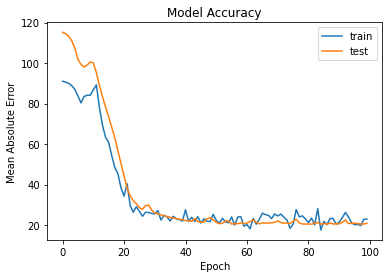

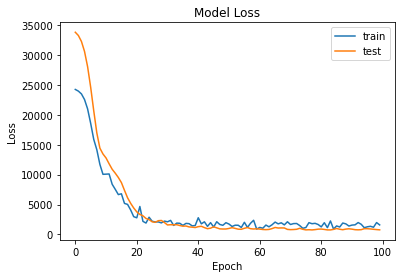

Mean Absolute Error:  22.938696
Validation Mean Absolute Error:  20.86762809753418


In [159]:
def create_model1(X_train):
    # create model
    model1 = Sequential()
    
    model1.add(Dense(4000, input_dim=X_train.shape[1], activation='relu',kernel_regularizer=regularizers.l2(1e-4)))
    model1.add(Dropout(0.3))
    model1.add(Dense(400, activation='relu',kernel_regularizer=regularizers.l2(1e-4)))
    model1.add(Dropout(0.3))
    model1.add(Dense(40, activation='relu',kernel_regularizer=regularizers.l2(1e-4)))
    model1.add(Dropout(0.3))
    model1.add(Dense(1,activation='linear',kernel_regularizer=regularizers.l2(1e-4)))
    
    model1.compile(optimizer ='adam', loss = 'mean_squared_error', 
              metrics =[metrics.mae])

    return model1
model1 = create_model1(X_egypt_train)
model1.summary()

history1 = model1.fit(X_egypt_train, Y_egypt_train, validation_data=(X_egypt_test,Y_egypt_test), epochs=100, batch_size=32)#, shuffle=False)
plt.plot(history1.history['mean_absolute_error'])
plt.plot(history1.history['val_mean_absolute_error'])
plt.title('Model Accuracy')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()
# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

train_mae_1 = history1.history['mean_absolute_error'][-1]
val_mae_1 = history1.history['val_mean_absolute_error'][-1]

print("Mean Absolute Error: ", train_mae_1)
print("Validation Mean Absolute Error: ", val_mae_1)

